In [28]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchinfo as ti
import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from simple_cnn import SimpleCNN

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [29]:
# Load MNIST dataset from torchvision
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [30]:
train_images = mnist_train.data.numpy()
train_labels = mnist_train.targets.numpy()
test_images = mnist_test.data.numpy()
test_labels = mnist_test.targets.numpy()

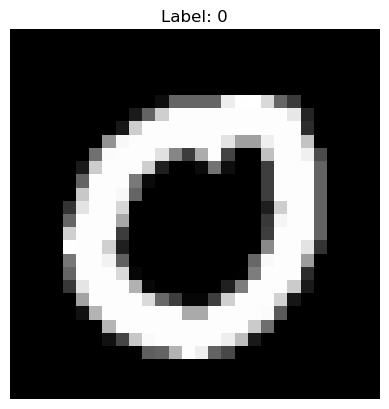

In [31]:
# Load random image from training set to visualize
random_index = np.random.randint(0, len(train_images))
random_image = train_images[random_index]
random_label = train_labels[random_index]

# Visualize the random image
plt.imshow(random_image, cmap='gray')
plt.title(f'Label: {random_label}')
plt.axis('off')
plt.show()

In [32]:
# Data loaders
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_images).unsqueeze(1).float()/255.0, torch.tensor(train_labels))
test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_images).unsqueeze(1).float()/255.0, torch.tensor(test_labels))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [33]:
model = SimpleCNN().to(device)
# Model summarize
ti.summary(model, input_size=(1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
SimpleCNN                                [1, 10]                   --
├─Conv2d: 1-1                            [1, 32, 28, 28]           320
├─MaxPool2d: 1-2                         [1, 32, 14, 14]           --
├─Conv2d: 1-3                            [1, 64, 14, 14]           18,496
├─MaxPool2d: 1-4                         [1, 64, 7, 7]             --
├─Linear: 1-5                            [1, 128]                  401,536
├─Dropout: 1-6                           [1, 128]                  --
├─Linear: 1-7                            [1, 10]                   1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 4.28
Input size (MB): 0.00
Forward/backward pass size (MB): 0.30
Params size (MB): 1.69
Estimated Total Size (MB): 1.99

In [37]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20
# Training loop
for epoch in tqdm.tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Evaluation loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in tqdm.tqdm(test_loader):
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
print(f'Test Accuracy: {100 * correct / total:.2f}%')
# Save the model
torch.save(model.state_dict(), 'mnist_cnn.pth')

  5%|▌         | 1/20 [00:03<01:11,  3.75s/it]

Epoch [1/20], Loss: 0.0255


 10%|█         | 2/20 [00:07<01:06,  3.67s/it]

Epoch [2/20], Loss: 0.0205


 15%|█▌        | 3/20 [00:11<01:02,  3.66s/it]

Epoch [3/20], Loss: 0.0179


 20%|██        | 4/20 [00:14<00:58,  3.65s/it]

Epoch [4/20], Loss: 0.0138


 25%|██▌       | 5/20 [00:18<00:55,  3.67s/it]

Epoch [5/20], Loss: 0.0126


 30%|███       | 6/20 [00:21<00:51,  3.65s/it]

Epoch [6/20], Loss: 0.0114


 35%|███▌      | 7/20 [00:25<00:47,  3.66s/it]

Epoch [7/20], Loss: 0.0109


 40%|████      | 8/20 [00:29<00:44,  3.67s/it]

Epoch [8/20], Loss: 0.0090


 45%|████▌     | 9/20 [00:33<00:40,  3.68s/it]

Epoch [9/20], Loss: 0.0083


 50%|█████     | 10/20 [00:36<00:37,  3.76s/it]

Epoch [10/20], Loss: 0.0081


 55%|█████▌    | 11/20 [00:40<00:33,  3.73s/it]

Epoch [11/20], Loss: 0.0060


 60%|██████    | 12/20 [00:43<00:28,  3.60s/it]

Epoch [12/20], Loss: 0.0073


 65%|██████▌   | 13/20 [00:47<00:24,  3.51s/it]

Epoch [13/20], Loss: 0.0075


 70%|███████   | 14/20 [00:50<00:20,  3.47s/it]

Epoch [14/20], Loss: 0.0065


 75%|███████▌  | 15/20 [00:54<00:17,  3.45s/it]

Epoch [15/20], Loss: 0.0053


 80%|████████  | 16/20 [00:57<00:13,  3.43s/it]

Epoch [16/20], Loss: 0.0066


 85%|████████▌ | 17/20 [01:00<00:10,  3.41s/it]

Epoch [17/20], Loss: 0.0060


 90%|█████████ | 18/20 [01:04<00:06,  3.39s/it]

Epoch [18/20], Loss: 0.0047


 95%|█████████▌| 19/20 [01:07<00:03,  3.36s/it]

Epoch [19/20], Loss: 0.0043


100%|██████████| 20/20 [01:10<00:00,  3.54s/it]


Epoch [20/20], Loss: 0.0051


100%|██████████| 157/157 [00:00<00:00, 535.92it/s]

Test Accuracy: 99.22%


Confusion Matrix:
 [[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1131    0    0    0    1    1    2    0    0]
 [   1    1 1026    0    0    0    1    3    0    0]
 [   0    0    2 1003    0    2    0    1    1    1]
 [   0    0    0    0  973    0    1    0    0    8]
 [   1    0    0    6    0  882    2    1    0    0]
 [   4    2    0    0    1    1  949    0    1    0]
 [   0    1    2    0    0    0    0 1022    0    3]
 [   3    1    0    1    0    1    0    3  962    3]
 [   0    1    0    0    5    1    0    4    1  997]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99    

Text(95.72222222222221, 0.5, 'True')

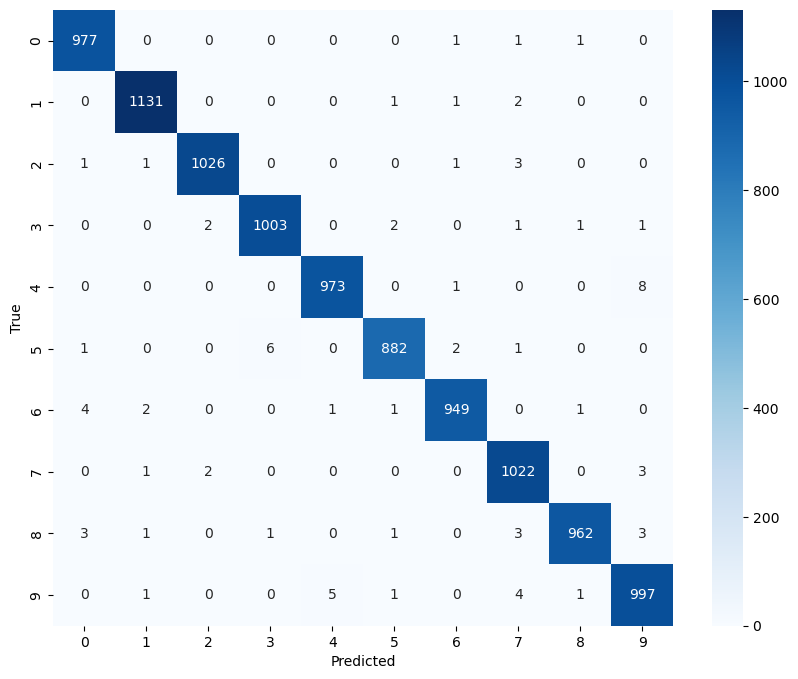

In [38]:
# Confusion matrix and full classification report
all_labels = []
all_predictions = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.cpu().numpy())
cm = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(all_labels, all_predictions))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')

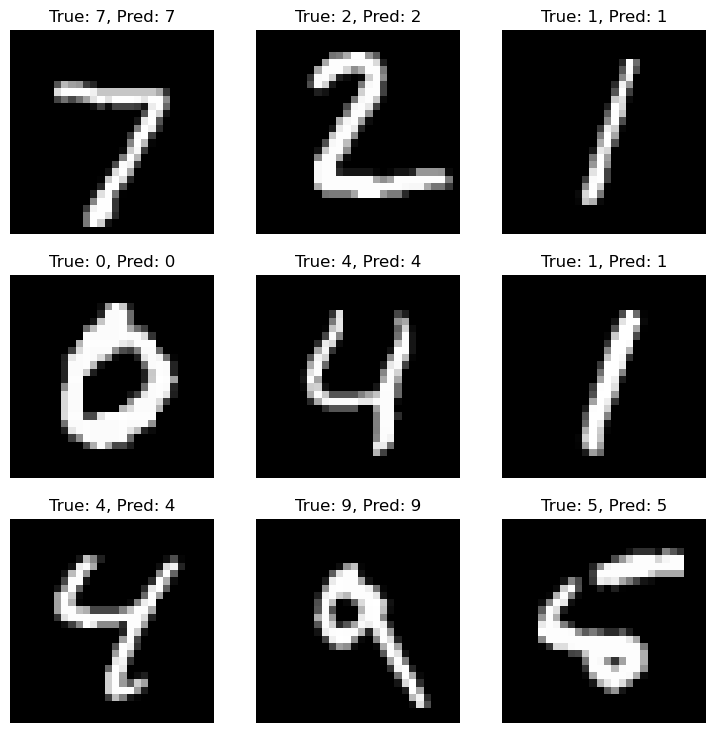

In [ ]:
# Visualize some predictions
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    images, labels, predicted = images.cpu(), labels.cpu(), predicted.cpu()
    pass
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f'True: {labels[i].item()}, Pred: {predicted[i].item()}')
    ax.axis('off')
plt.show()